Tried lots of stuff but actually the work I did yesterday was better, found out in their paper that their particle mass is off compared to the one I had by a factor of 10 which may expalin the discrepancy off by 1 OOM 

each of the particle has a constant mass of 2.75491975e+43 g 

In [1]:
%pylab inline
import yt

Populating the interactive namespace from numpy and matplotlib


In [2]:
centers  = np.loadtxt("../scivis2MMBK/centers40000.txt")
labels  = np.loadtxt("../scivis2MMBK/labels40000.txt")
density  = np.loadtxt("../scivis2MMBK/density40000.txt")

In [3]:
yt.funcs.mylog.setLevel(50)

In [4]:
ds = yt.load("../../ds14_scivis_0128_e4_dt04_1.0000")
ad = ds.all_data()
grid= ds.covering_grid(1,[0,0.0,0.0],dims=[32,32,32])
pcl_dens =  grid[('deposit','all_cic')]

In [5]:
mass = ad[('all', 'mass')]
particle_mass = ad[('all', 'particle_mass')]

In [6]:
print mass == particle_mass
print particle_mass

[ True  True  True ...,  True  True  True]
[  2.75491975e+43   2.75491975e+43   2.75491975e+43 ...,   2.75491975e+43
   2.75491975e+43   2.75491975e+43] g


In [7]:
np.unique(particle_mass)

YTArray([  2.75491975e+43]) g

In [178]:
M_sol = 1.9891e33 #grams
h = 0.6881 #reduced hubble constant
# h = 68.81
# m = 2.75491975e+43 /M_sol*h 
# print "mass per particle : ", m,"Msun/h"
m=3.9e10

In [179]:
m

39000000000.0

In [180]:
halo_catalog = np.loadtxt("../../darksky_catalog/ds14_a_halos_1.0000_filter_1e15.txt",skiprows=3)
N= halo_catalog[:,4]/m #number of particle per halo = m200b/mass per particle

$$M_{halo} = N*m $$

In [181]:
idx_list = []
N_list = []
for i in np.arange(40000): 
    idx = np.where(labels==i)[0]
    idx_list.append(idx)
    N_list.append(len(idx))idx = np.array(idx_list)

In [182]:
idx = np.array(idx_list)
N = np.array(N_list)

In [183]:
# plt.hist(M_halo)
# n, bins, patches  = plt.hist(np.log10(M_halo),log=True,histtype='step')#, normed=True)
# plt.xlabel("log10(m200b)",fontsize = 15)
# plt.ylabel("Count",fontsize = 15)

Actually since this is a smaller subset of the whole simulation, the volume is probably different . According to [scivis website](http://darksky.slac.stanford.edu/scivis2015/data/), this is an 128^3 particle dataset

In [184]:
# V = 8000.**3
# n = N/V
# m200_b = N*m

In [185]:
import thingking
import matplotlib.colors as col
import matplotlib.cm as cm
import sys, string, math

def discrete_cmap(N=8):
    """create a colormap with N (N<15) discrete colors and register it"""
    # define individual colors as hex values
#    cpool = [ '#000000', '#ff0000', '#00e000', '#0000ff', '#00e0e0',
#             '#ff00ff', '#e0e000', '#ffa500', '#ee82ee', '#808080',
#              '#800000', '#008000', '#000080', '#808000', '#800080' ]
    cpool=[ '#050505','#030303','#1a1a1a','#333333','#7d7d7d','#838b8b','#c1cdcd','#bebebe']
    cmap3 = col.ListedColormap(cpool[0:N], 'indexed')
    cm.register_cmap(cmap=cmap3)

discrete_cmap(5)
color=cm.get_cmap('indexed')

mf_prefix = "http://darksky.slac.stanford.edu/data_release/mass_function/"
mfs = [
    #"ds14_a_halos_1.0000.hist50_m200b.sdf",
    "ds14_a_halos_1.0000.hist8_m200b",
#     "ds14_g_1600_4096_m200b_1.0000.hist8_m200b",
#     "ds14_g_800_4096_m200b_1.0000.hist8_m200b",
#     "ds14_g_200_2048_m200b_1.0000.hist8_m200b",
#     "ds14_g_100_2048_m200b_1.0000.hist8_m200b",
]
mfs = [mf_prefix + mf for mf in mfs]

In [186]:
plt.hist?

In [187]:
np.histogram?

In [188]:
halo_catalog = np.loadtxt("../../darksky_catalog/ds14_a_halos_1.0000_filter_1e15.txt",skiprows=3)

# n_1, bins = np.histogram(N1)#,histtype='step',color="red");
# plt.xlabel("m200b",fontsize = 15)
# plt.ylabel("Count",fontsize = 15)
# plt.loglog(bins[:-1], n_1/V,ms=4, mec='None',color="blue")

In [189]:
m200b

array([  9.42843676e+15,   7.99829694e+15,   7.17643294e+15, ...,
         1.00003602e+15,   1.00003602e+15,   1.00003602e+15])

In [190]:
# # plt.xlabel("log10(m200b)",fontsize = 15)
# # plt.ylabel("dN/dlnM ",fontsize = 15)
# n_2, bins_2, patches  = plt.hist(m200_b,log=True,histtype='step')#, normed=True)
# ngtm_2 = np.cumsum(n_2[::-1])[::-1]
# # plt.semilogy(bins_2[:-1], ngtm_2/V,label="Halo_catalog",ms=4, mec='None',color="blue")

In the [reduced histogram files](http://darksky.slac.stanford.edu/data_release/mass_function/ds14_a_halos_1.0000.hist8_m200b) for the datafile that spans $10^15-10^16 M_\odot/h$, it looks like they used a normalization of  volume 5.12e+11 [Mpc^3/h^3]

In [191]:
5.12e+11**(1/3.)

7999.999999999996

In [192]:
N_1, bins = np.histogram(N1)

In [193]:
N_1

array([122021,  12033,   1967,    446,     88,     30,      3,      2,
            1,      1])

In [194]:
ngtm

array([  9.89317746e+03,   1.82857215e+04,   2.58158908e+04, ...,
         1.96427577e+08,   1.96428626e+08,   1.96429676e+08])

In [195]:
shape(ngtm)

(136592,)

In [196]:
np.histogram?

In [197]:
bins

array([ 1049.32918013,  1933.71400841,  2818.0988367 ,  3702.48366498,
        4586.86849327,  5471.25332155,  6355.63814984,  7240.02297812,
        8124.40780641,  9008.79263469,  9893.17746298])

In [198]:
shape(dN)

(136590,)

In [199]:
shape(dlnM)
shape(m200b)

(136592,)

Attempting to do differential by Stirling approximation but it looks like this is a terrible idea ..

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide


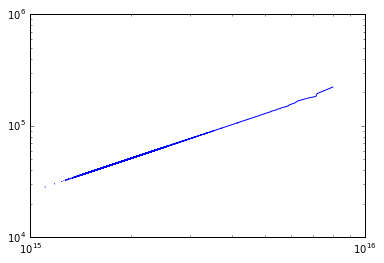

In [200]:
m200b= halo_catalog[:,4]
N1 = m200b/m
N_1, bins = np.histogram(m200b)
dN = (np.roll(N1,1)-N1)[1:-1]
dlnM = (np.log(np.roll(m200b,1))-np.log(m200b))[1:-1]
ngtm = np.cumsum(N1)#[::-1])[::-1]
plt.loglog(m200b[1:-1],dN/dlnM)

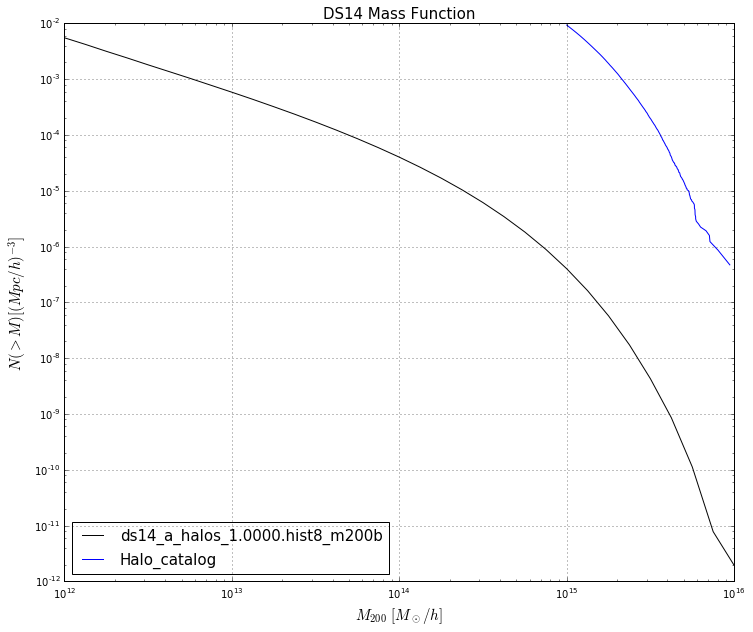

In [203]:
# V =10240.**3
V = 8000**3
i=0
fig = plt.figure(figsize=(12,10))
xx = fig.add_subplot(111)
vols = np.array([8000.0, 1600, 800, 200, 100])
for aname, vol in zip(mfs, vols):
    bin_center_mass, dn_dlnM, sigma, dlogsdlogm, lower_pmass, n, expected, dm, ds, dlnm, dlns = thingking.loadtxt(aname, unpack=True)
#     print bin_center_mass[1]
    tag = aname.split("/")[-1]
#     mask = (lower_pmass[:] >= 0) * (n[:] >= 0)
#     if n.sum() > 0:
    ngtm = np.cumsum(n[mask][::-1])[::-1]
    xx.loglog(bin_center_mass, ngtm/vol**3,ms=4, mec='None',color=color(i), label=tag) #color="gray")#,label="ds14_histo8* data")#, label=tag)
    i += 1

m200b= halo_catalog[:,4]
N1 = m200b/m
N_1, bins = np.histogram(m200b)
# print bins
ngtm = np.cumsum(N1)#[::-1])[::-1]
# n_1, bins = plt.hist(ngtm/V)
xx.loglog(m200b, ngtm/V,label="Halo_catalog",ms=4, mec='None',color="blue")

# ngtm2 = np.cumsum(n_2[::-1])[::-1]
# xx.loglog(bins[:-1], ngtm2,label="Clustered results",ms=4, mec='None',color="red")

xx.set_title('DS14 Mass Function',fontsize=15)
xx.set_xscale('log')
xx.set_yscale('log')
xx.set_xlabel('$M_{200}\  [M_\odot/h]$', fontdict={'fontsize':14},fontsize=15)
xx.set_ylabel('$N(>M) [(Mpc/h)^{-3}]$', fontdict={'fontsize':14},fontsize=15)
leg = xx.legend(loc="lower left",labelspacing=.5,fontsize=15)
xx.xaxis.grid(True, which='major')
xx.yaxis.grid(True, which='major')
# plt.xlim(1e12,1e16)
plt.show()